In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_param_effect(
    df, param, outcome,
    figsize=(12,8),
    max_xticks=25,
    x_label = None,
    y_label = None,
):
    """
    Boxplot (showing the MEAN instead of median) + jitter with subsampled x-axis labels.

    Parameters
    ----------
    df : pd.DataFrame
    param : str
    outcome : str
    figsize : tuple
    jitter_width : float
    max_xticks : int, max number of x labels to show
    """
    data = df[[param, outcome]].dropna()
    x_vals = sorted(data[param].unique())
    positions = np.arange(len(x_vals))
    grouped = [data[data[param]==x][outcome].values for x in x_vals]

    fig, ax = plt.subplots(figsize=figsize)

    # Boxplot showing means
    bp = ax.boxplot(
        grouped,
        positions=positions,
        widths=0.6,
        patch_artist=True,
        showmeans=True,                     # display mean marker
        meanprops=dict(marker='D',         # diamond marker
                       markeredgecolor='firebrick',
                       markerfacecolor='firebrick',
                       markersize=2.5),
        medianprops=dict(color='gray', linewidth=1),  # hide median line
        boxprops=dict(facecolor='lightgray', edgecolor='black'),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black'),
        flierprops=dict(marker='o', color='gray', alpha=0.3, markersize=3)
    )

    # Jittered scatter

    # Subsample x-ticks
    n = len(x_vals)
    if n > max_xticks:
        tick_idx = np.linspace(0, n-1, max_xticks, dtype=int)
    else:
        tick_idx = np.arange(n)

    ax.set_xticks(positions[tick_idx])
    ax.set_xticklabels([f"{x_vals[i]:.2f}" for i in tick_idx], rotation=45, fontsize=10)
    if x_label is not None:
        x_title = x_label
    else:
        x_title = param.replace('_', ' ')
    if y_label is not None:
        y_title = y_label
    else:
        y_title = outcome.replace('_', ' ')
    ax.set_xlabel(x_title, fontsize=12)
    ax.set_ylabel(y_title, fontsize=12)
    ax.set_title(f"{x_title} → {y_title}", fontsize=14, pad=12)

    ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=10)

    plt.tight_layout()
    return fig


In [89]:
df = pd.read_csv('ethnic_violence_batch_results_6000.csv')
df['Alpha-Beta Ratio'] = df['alpha'] / df['beta']
# df['Alpha-Beta Ratio'] should round to closest 0.5
df['Alpha-Beta Ratio'] = (df['Alpha-Beta Ratio'] * 2).round() / 2
# error due to my code mistake
# count row num of all alpha-beta ratios 
print("Number of rows for each Alpha-Beta Ratio:")
print(df['Alpha-Beta Ratio'].value_counts().sort_index())
# count row num of all alpha-beta ratios with rounding to closest 0.5
filtered_ratios = df['Alpha-Beta Ratio'].value_counts()
filtered_ratios = filtered_ratios[filtered_ratios >  300]
filtered_ratios
df = df[df['Alpha-Beta Ratio'].isin(filtered_ratios.index)]


Number of rows for each Alpha-Beta Ratio:
Alpha-Beta Ratio
0.5     600
1.0     600
4.0     600
7.0     600
10.0    600
13.0    600
16.0    600
19.0    600
22.0    600
25.0    600
Name: count, dtype: int64


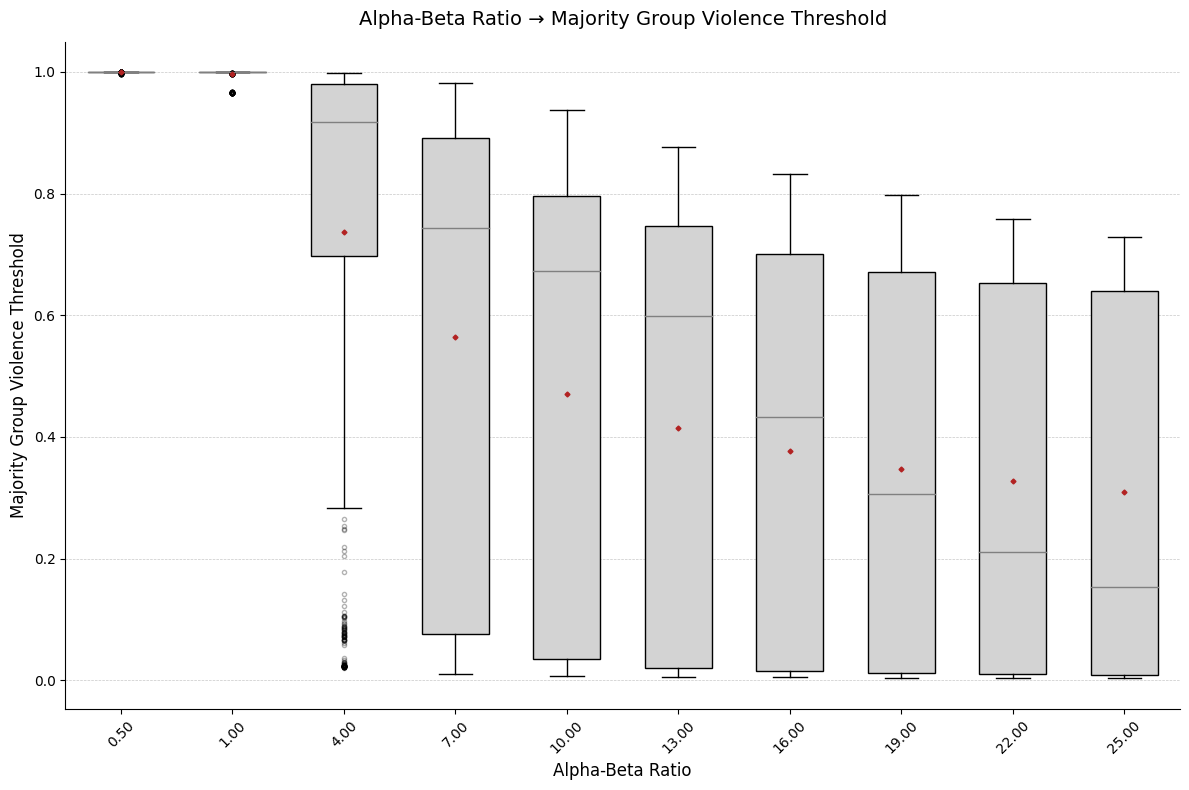

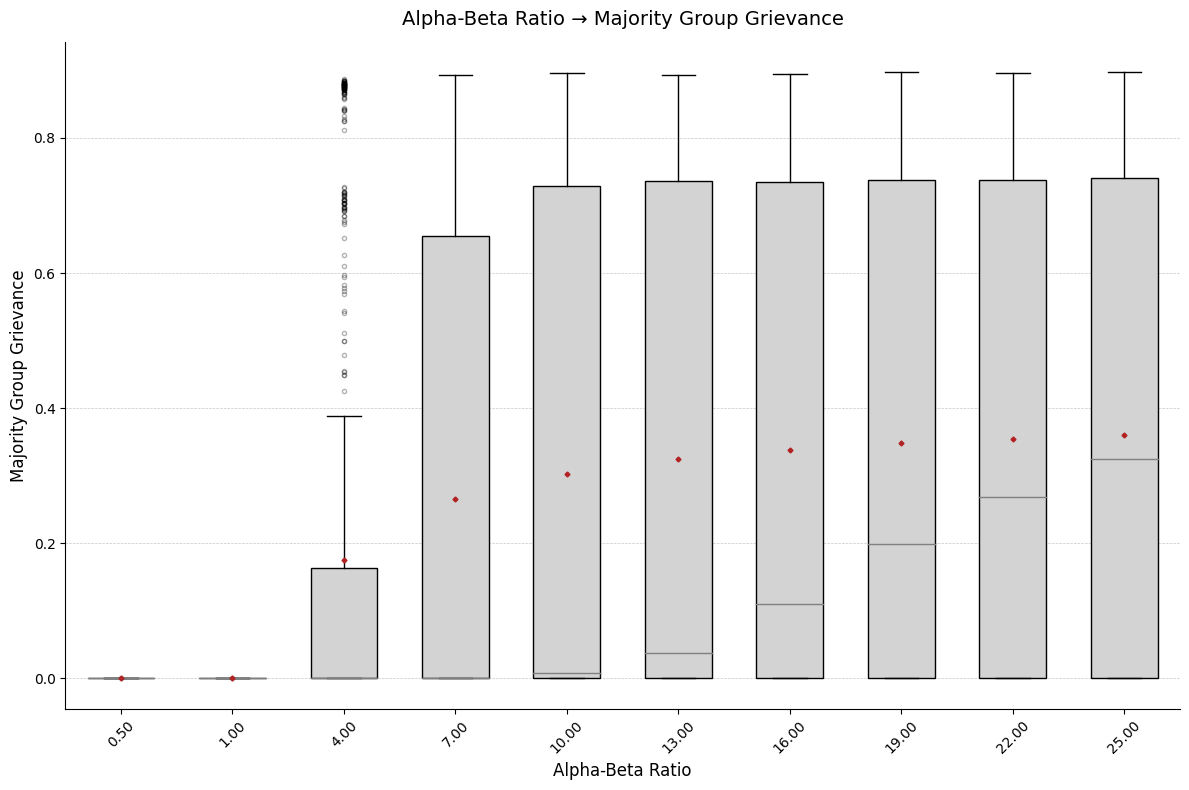

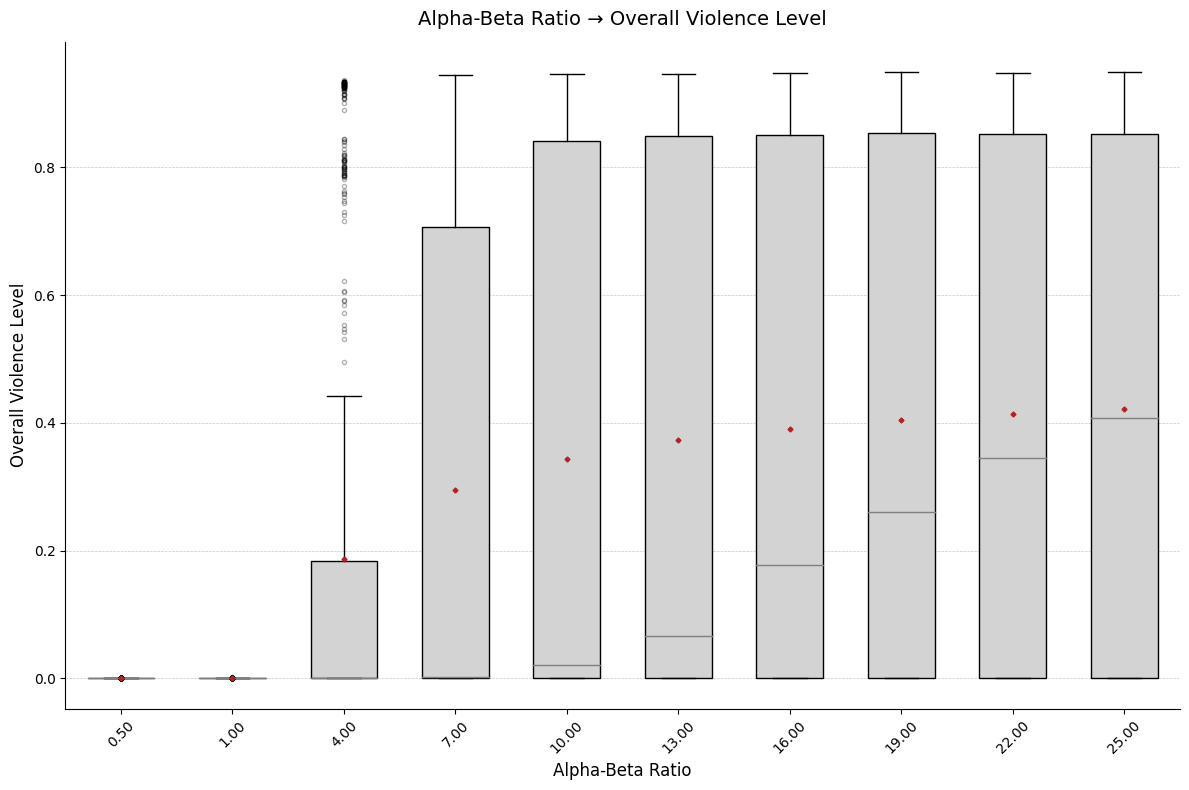

In [90]:
fig = plot_param_effect(df, 'Alpha-Beta Ratio', 'Avg_Maj_Threshold', x_label='Alpha-Beta Ratio', y_label='Majority Group Violence Threshold')
plt.show()
fig = plot_param_effect(df, 'Alpha-Beta Ratio', 'Avg_Maj_Grievance',   x_label='Alpha-Beta Ratio', y_label='Majority Group Grievance')
plt.show()
fig = plot_param_effect(df, 'Alpha-Beta Ratio', 'Overall_Violence_Level',  x_label='Alpha-Beta Ratio', y_label='Overall Violence Level')
plt.show()

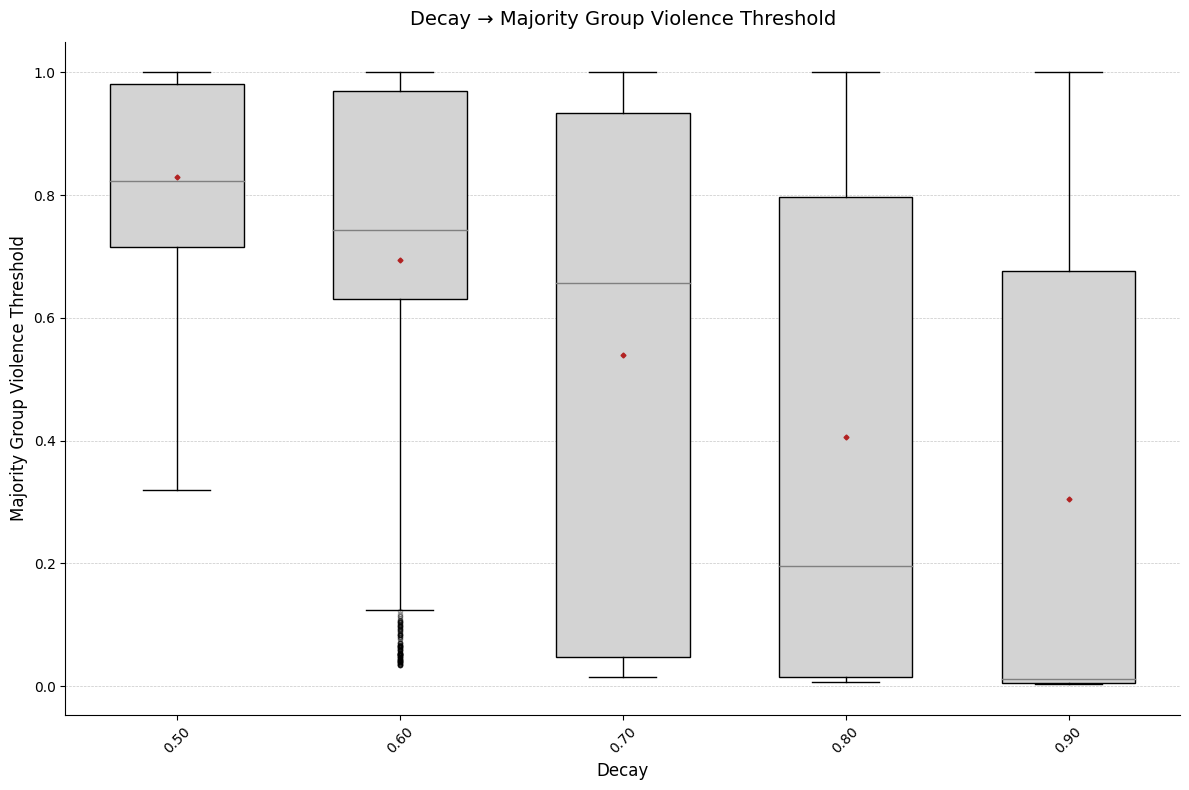

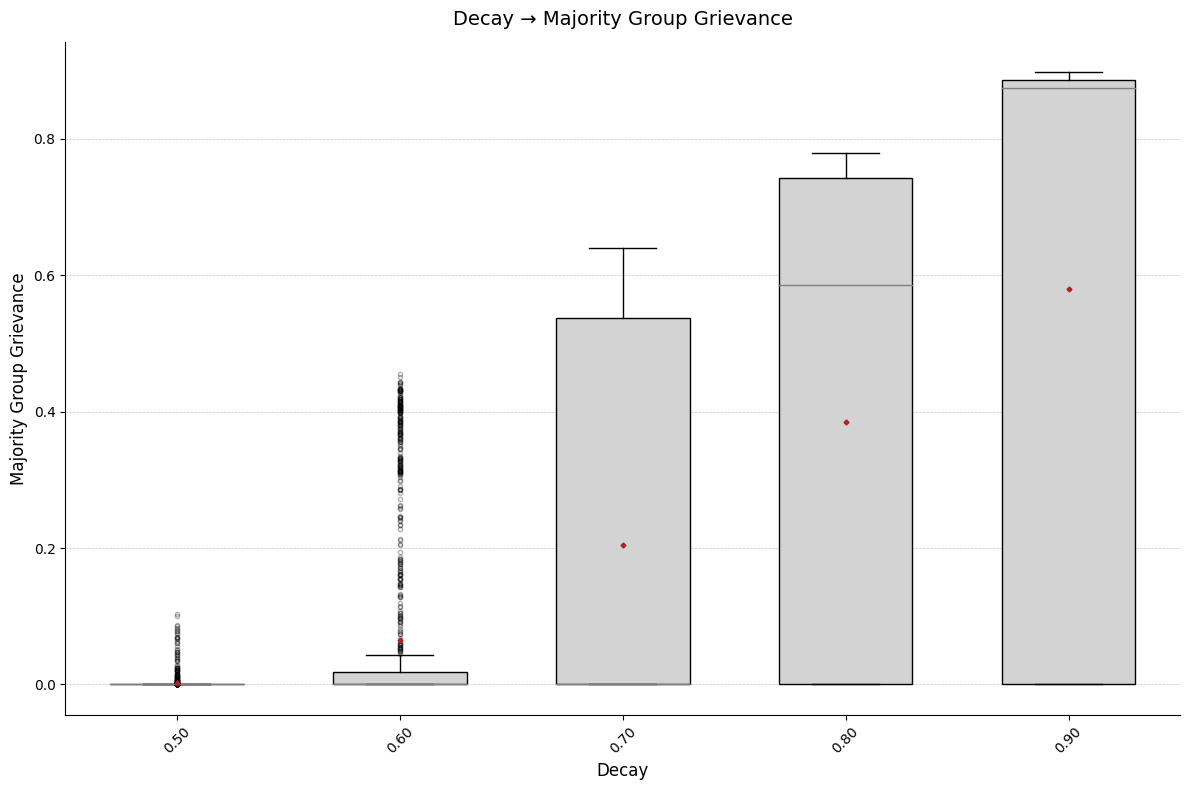

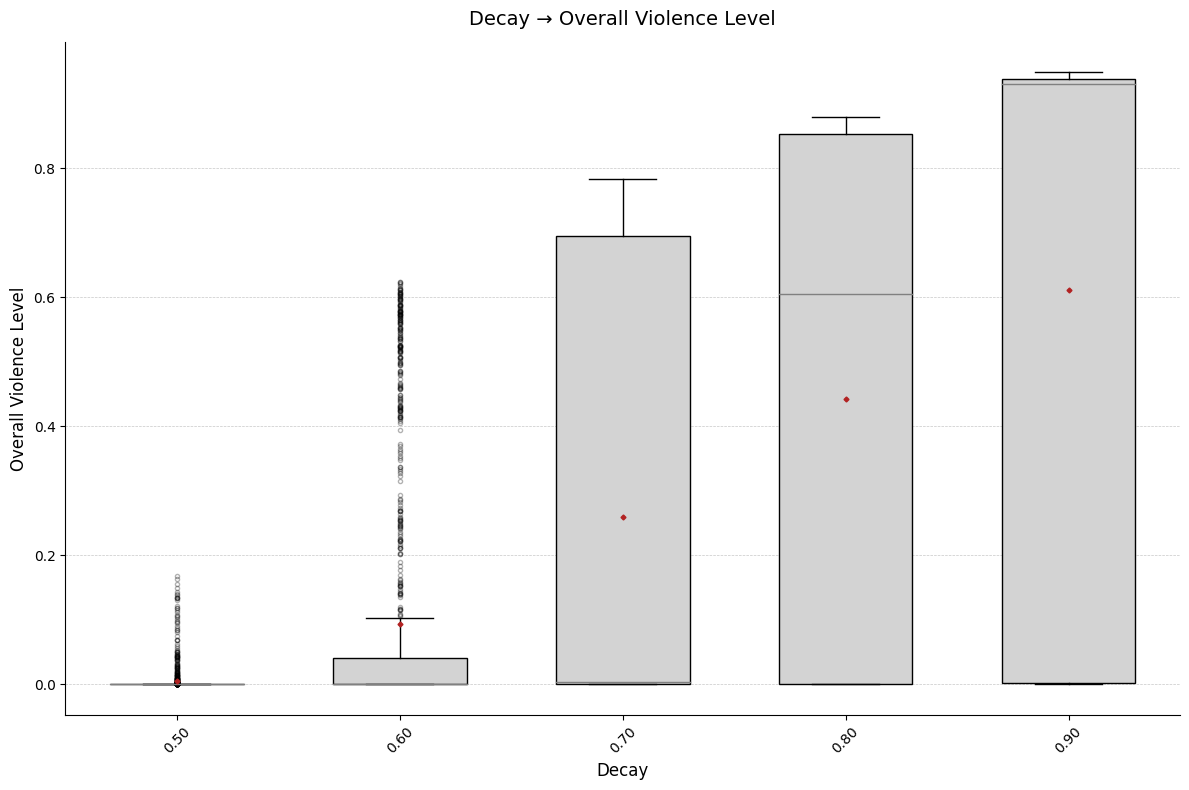

In [109]:
fig = plot_param_effect(df, 'decay', 'Avg_Maj_Threshold', x_label='Decay', y_label='Majority Group Violence Threshold')
plt.show()
fig = plot_param_effect(df, 'decay', 'Avg_Maj_Grievance',   x_label='Decay', y_label='Majority Group Grievance')
plt.show()
fig = plot_param_effect(df, 'decay', 'Overall_Violence_Level',  x_label='Decay', y_label='Overall Violence Level')
plt.show()

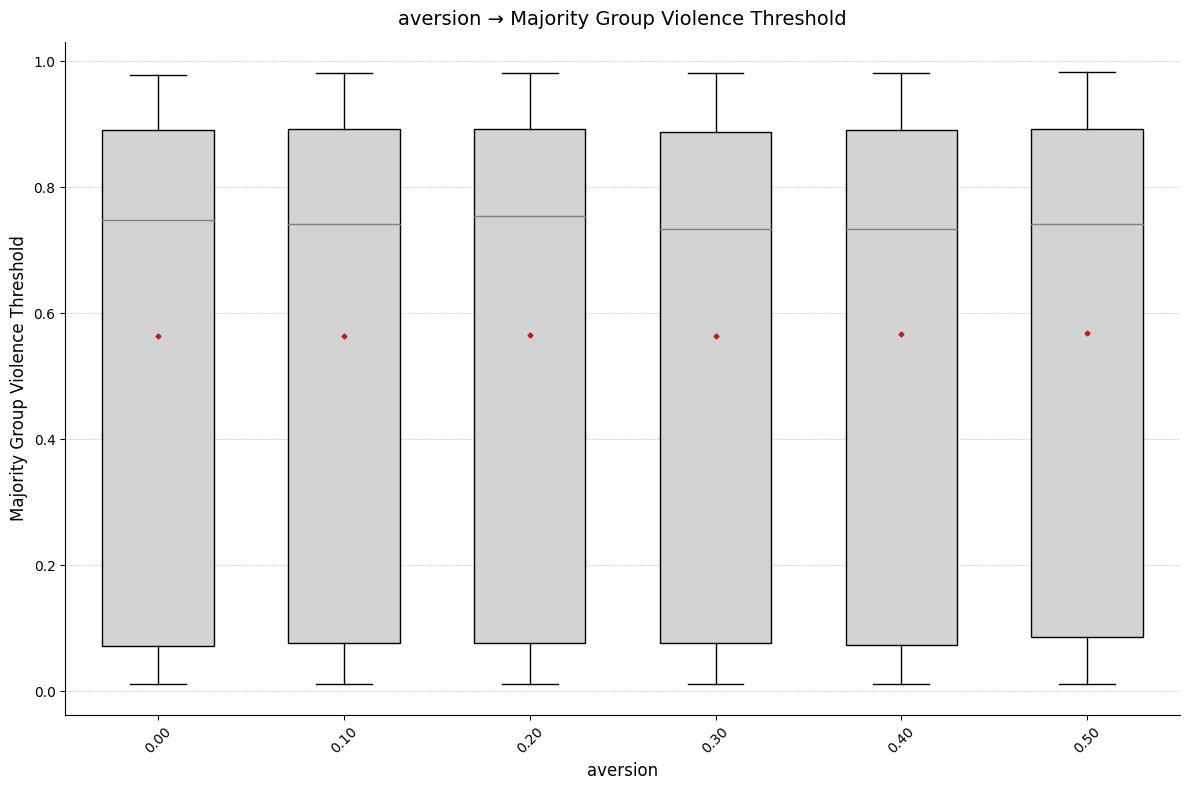

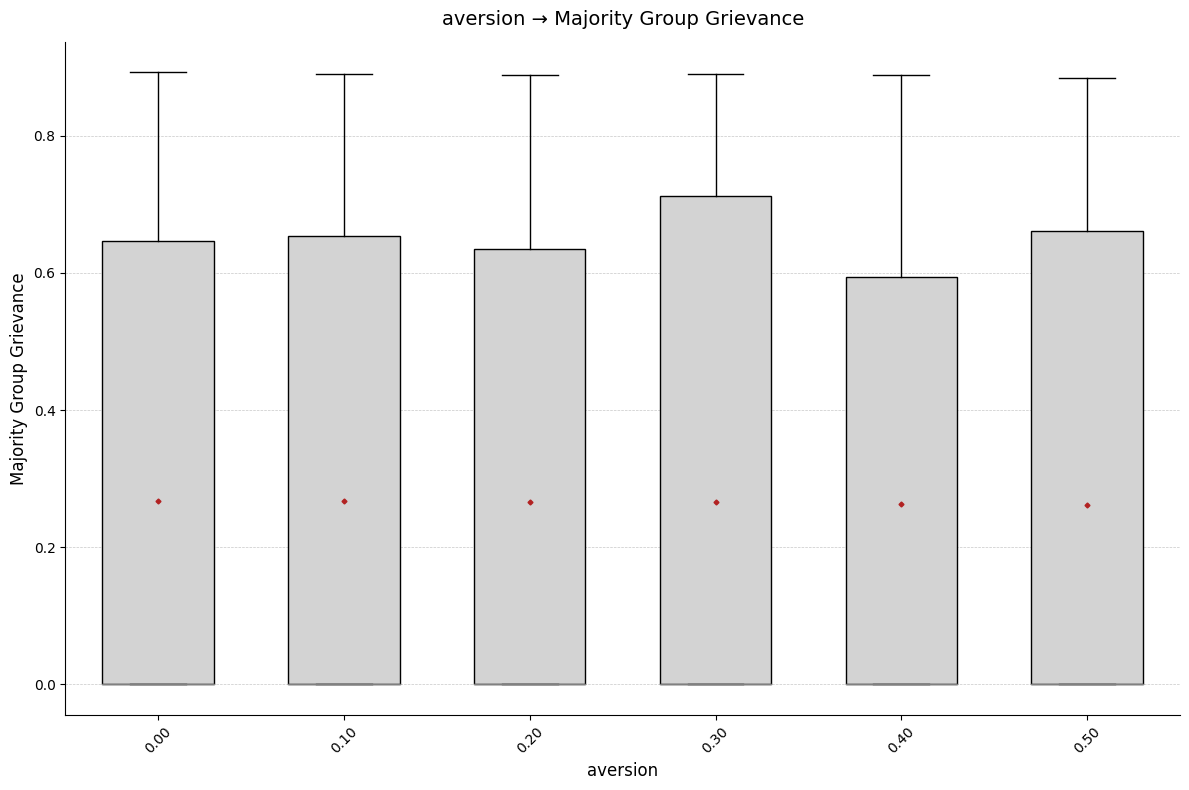

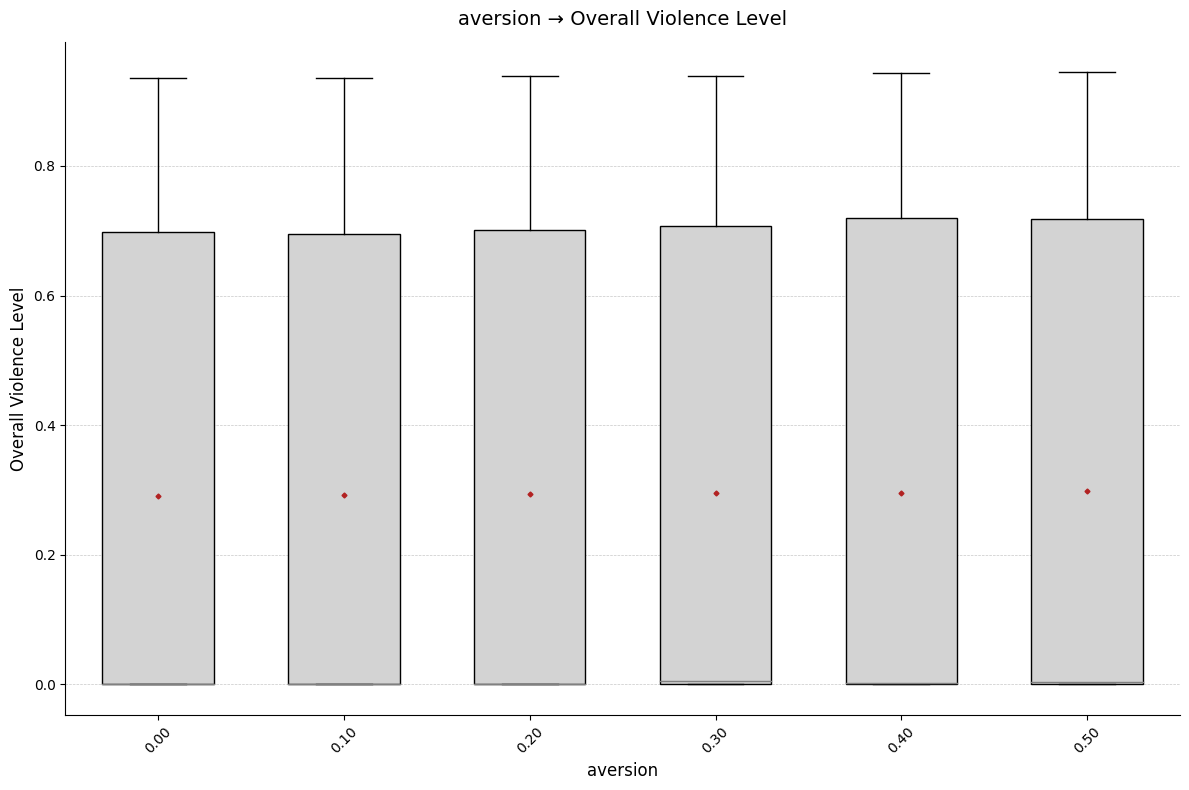

In [101]:

ratio_7  = df[(df['Alpha-Beta Ratio'] == 7)]
fig = plot_param_effect(ratio_7, 'aversion', 'Avg_Maj_Threshold', x_label='aversion', y_label='Majority Group Violence Threshold')
plt.show()
fig = plot_param_effect(ratio_7, 'aversion', 'Avg_Maj_Grievance',   x_label='aversion', y_label='Majority Group Grievance')
plt.show()
fig = plot_param_effect(ratio_7, 'aversion', 'Overall_Violence_Level',  x_label='aversion', y_label='Overall Violence Level')
plt.show()

In [71]:
# find all 'Alpha-Beta Ratio' = 4
alpha_beta_4 = df[df['Alpha-Beta Ratio'] == 12.5]
alpha_beta_4

,width,height,majority_pct,density,alpha,beta,decay,vision,aversion,iteration,step_count,Avg_Maj_Grievance,Avg_Min_Grievance,Avg_Maj_Threshold,Overall_Violence_Level,Alpha-Beta Ratio
600,80,80,0.7,0.7,0.05,0.004,0.5,2,0.0,0,50,0.000000,0.000000,0.669577,0.000000,12.5
601,80,80,0.7,0.7,0.05,0.004,0.5,2,0.0,1,50,0.000000,0.000000,0.665651,0.000000,12.5
602,80,80,0.7,0.7,0.05,0.004,0.5,2,0.1,0,50,0.000000,0.000000,0.657853,0.000016,12.5
603,80,80,0.7,0.7,0.05,0.004,0.5,2,0.1,1,50,0.000000,0.000000,0.663159,0.000000,12.5
604,80,80,0.7,0.7,0.05,0.004,0.5,2,0.2,0,50,0.000000,0.000000,0.661232,0.000000,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,80,80,0.7,0.7,0.15,0.012,0.9,2,0.4,0,50,0.909363,0.953539,0.010421,0.949234,12.5
2576,80,80,0.7,0.7,0.15,0.012,0.9,2,0.3,1,50,0.909607,0.955461,0.009987,0.948719,12.5
2577,80,80,0.7,0.7,0.15,0.012,0.9,2,0.4,1,50,0.909573,0.955263,0.010475,0.949203,12.5
2578,80,80,0.7,0.7,0.15,0.012,0.9,2,0.5,1,50,0.908961,0.957904,0.010734,0.952812,12.5


In [104]:
filtered_rows = df[(df['Alpha-Beta Ratio'] == 4) & (df['Avg_Maj_Threshold'].between(0.44, 0.56))]
filtered_rows

,width,height,majority_pct,density,alpha,beta,decay,vision,aversion,iteration,step_count,Avg_Maj_Grievance,Avg_Min_Grievance,Avg_Maj_Threshold,Overall_Violence_Level,Alpha-Beta Ratio
1950,80,80,0.7,0.7,0.2,0.050,0.9,1,0.1,0,50,0.500056,0.629421,0.445466,0.420261,4.0
1960,80,80,0.7,0.7,0.2,0.050,0.9,1,0.2,0,50,0.448715,0.565711,0.498964,0.375980,4.0
1976,80,80,0.7,0.7,0.2,0.050,0.9,1,0.4,0,50,0.425332,0.537248,0.519851,0.368652,4.0
1979,80,80,0.7,0.7,0.2,0.050,0.9,1,0.0,1,50,0.454877,0.567766,0.487551,0.365460,4.0
1986,80,80,0.7,0.7,0.2,0.050,0.9,1,0.3,0,50,0.449278,0.589337,0.490602,0.380200,4.0
1988,80,80,0.7,0.7,0.2,0.050,0.9,1,0.5,0,50,0.453101,0.580237,0.475981,0.413424,4.0
1989,80,80,0.7,0.7,0.2,0.050,0.9,1,0.4,1,50,0.388277,0.504090,0.551315,0.343602,4.0
5546,80,80,0.7,0.7,0.5,0.125,0.7,1,0.0,0,50,0.236038,0.346239,0.540926,0.258820,4.0


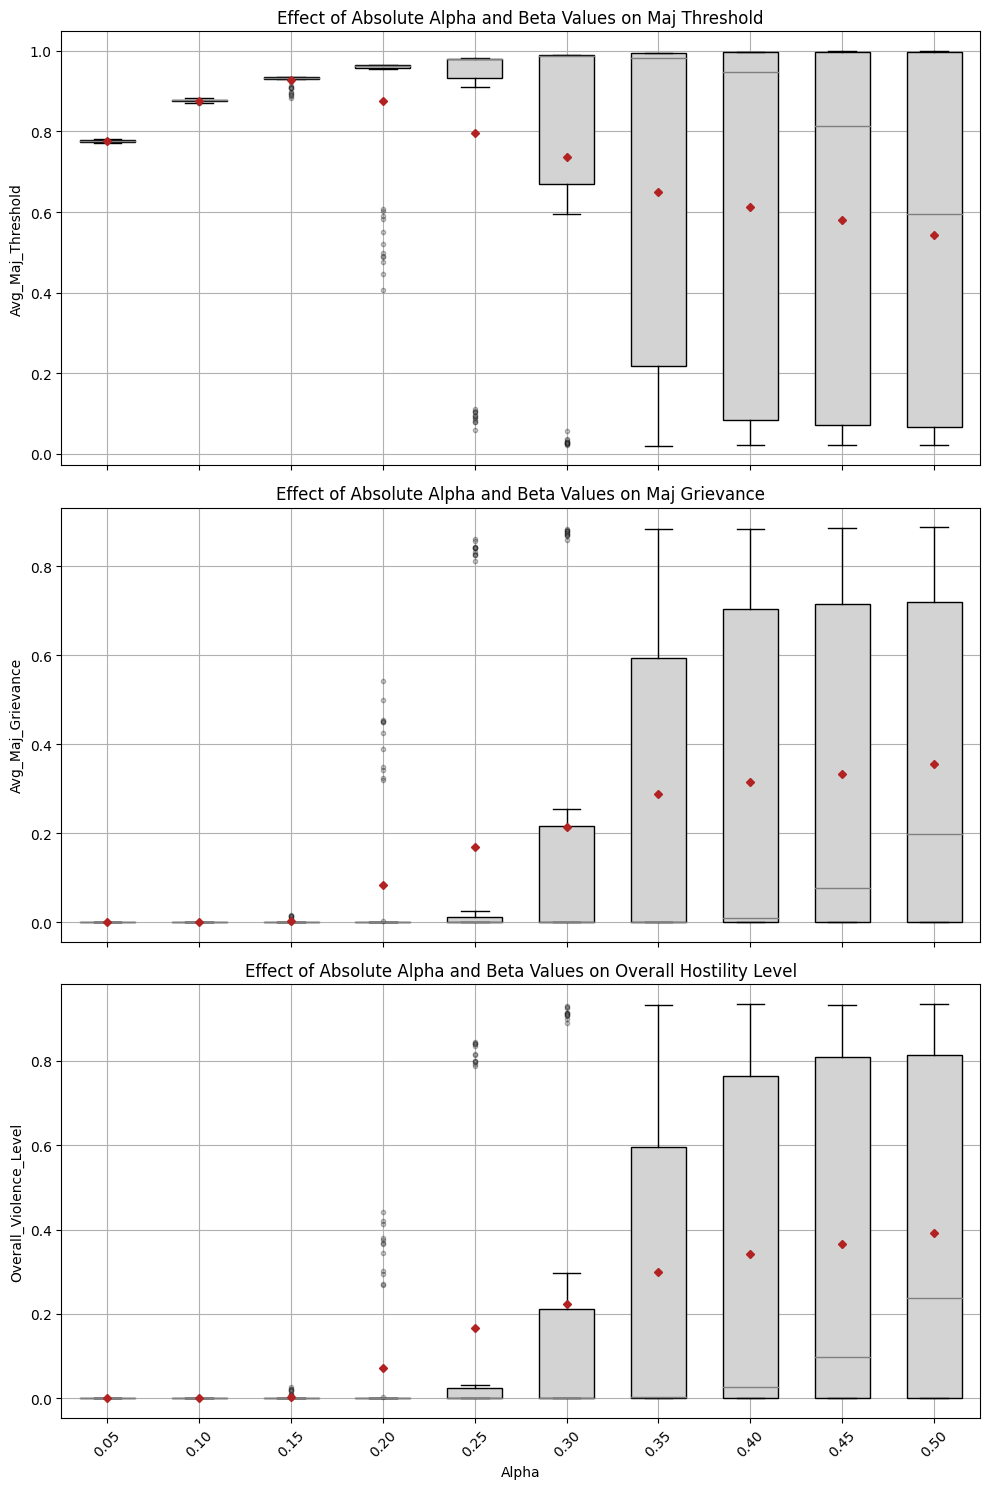

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for Alpha-Beta Ratio = 7
alpha_beta_4 = df[df['Alpha-Beta Ratio'] == 4]

# Get sorted unique alpha values and corresponding positions for x-axis
x_vals = sorted(alpha_beta_4['alpha'].unique())
positions = np.arange(len(x_vals))

# Group data by alpha for each outcome
grouped_threshold = [alpha_beta_4[alpha_beta_4['alpha'] == x]['Avg_Maj_Threshold'].values for x in x_vals]
grouped_grievance = [alpha_beta_4[alpha_beta_4['alpha'] == x]['Avg_Maj_Grievance'].values for x in x_vals]
grouped_violence  = [alpha_beta_4[alpha_beta_4['alpha'] == x]['Overall_Violence_Level'].values for x in x_vals]

# Create a figure with 3 subplots sharing the x-axis
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Common boxplot properties
boxprops = dict(facecolor='lightgray', edgecolor='black')
meanprops = dict(marker='D', markeredgecolor='firebrick', markerfacecolor='firebrick', markersize=4)
flierprops = dict(marker='o', markerfacecolor='gray', markersize=3, alpha=0.3)

# Plot Avg_Maj_Threshold boxplot
axes[0].boxplot(grouped_threshold, positions=positions, widths=0.6, patch_artist=True,
                showmeans=True, meanprops=meanprops, flierprops=flierprops,
                boxprops=boxprops, medianprops=dict(color='gray', linewidth=1))
axes[0].set_title('Effect of Absolute Alpha and Beta Values on Maj Threshold')
axes[0].set_ylabel('Avg_Maj_Threshold')
axes[0].grid(True)

# Plot Avg_Maj_Grievance boxplot
axes[1].boxplot(grouped_grievance, positions=positions, widths=0.6, patch_artist=True,
                showmeans=True, meanprops=meanprops, flierprops=flierprops,
                boxprops=boxprops, medianprops=dict(color='gray', linewidth=1))
axes[1].set_title('Effect of Absolute Alpha and Beta Values on Maj Grievance')
axes[1].set_ylabel('Avg_Maj_Grievance')
axes[1].grid(True)

# Plot Overall_Violence_Level boxplot
axes[2].boxplot(grouped_violence, positions=positions, widths=0.6, patch_artist=True,
                showmeans=True, meanprops=meanprops, flierprops=flierprops,
                boxprops=boxprops, medianprops=dict(color='gray', linewidth=1))
axes[2].set_title('Effect of Absolute Alpha and Beta Values on Overall Hostility Level')
axes[2].set_ylabel('Overall_Violence_Level')
axes[2].set_xlabel('Alpha')
axes[2].grid(True)

# Set x-axis labels using the alpha values
axes[2].set_xticks(positions)
axes[2].set_xticklabels([f"{x:.2f}" for x in x_vals], rotation=45, fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# 

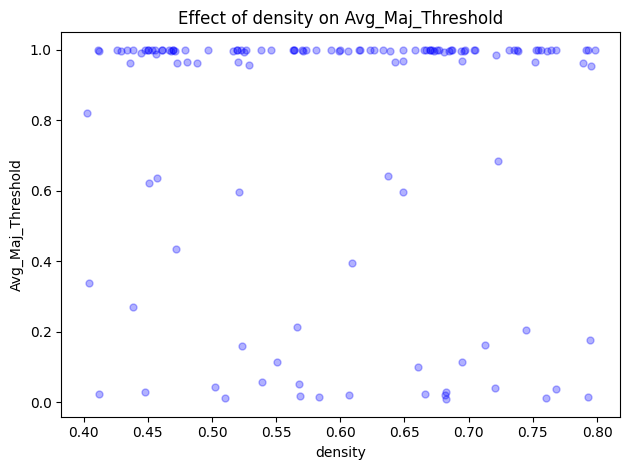

In [27]:
fig = plot_param_effect(df, 'density', 'Avg_Maj_Threshold', bins=None)
plt.show()

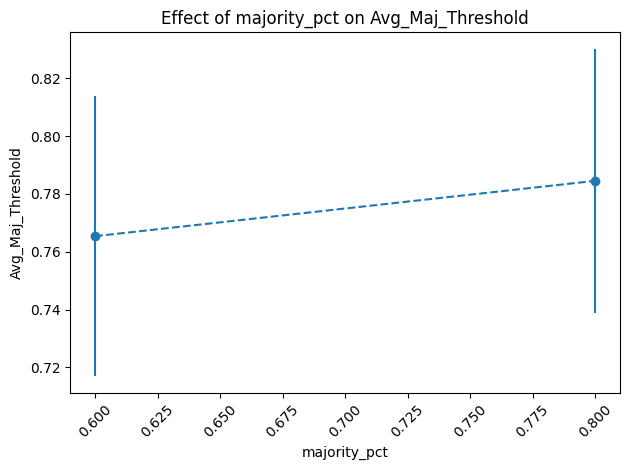

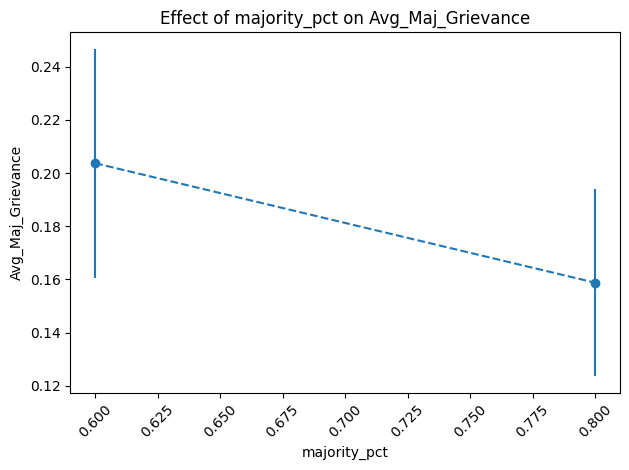

In [14]:
fig = plot_param_effect(df, 'majority_pct', 'Avg_Maj_Threshold', bins=None)
plt.show()
fig = plot_param_effect(df, 'majority_pct', 'Avg_Maj_Grievance', bins=None)
plt.show()